## Name: Sharon Njogu
### Instructor: Asha Deen


## Introduction:

In today's competitive telecommunications industry, retaining customers and minimizing churn is of paramount importance. SyriaTel, a prominent telecommunications company, faces a common challenge: customer churn. Churn, which refers to customers discontinuing their services, can have a significant impact on a company's bottom line. The objective of this project is to build a classifier that predicts customer churn, enabling SyriaTel to take proactive measures to retain customers and boost long-term profitability.

## Business Problem:

The telecommunications landscape is marked by dynamic customer preferences and fierce competition. In such an environment, customer churn poses a substantial threat to SyriaTel's financial stability. Each departing customer not only represents lost revenue but also incurs acquisition costs for new customer replacements. Addressing customer churn, therefore, is critical for SyriaTel's sustainability and growth.

## Business Value:

Reducing customer churn is not only about preserving revenue but also about fostering customer satisfaction and loyalty. By predicting which customers are most likely to churn, SyriaTel can tailor retention strategies, enhance service quality, and improve customer relationships. This, in turn, results in higher customer lifetime value, increased market share, and a healthier financial outlook.

## Audience:

The primary audience for this project is SyriaTel and other telecom businesses grappling with similar churn issues. SyriaTel's senior management, marketing teams, and customer service departments will benefit from insights generated through this analysis. By implementing the findings, they can mitigate churn, enhance customer experiences, and ensure a competitive edge.

## Key Questions:

Can historical data reveal patterns indicating when a customer is likely to churn?
What factors hold the most influence over customer churn?
Can we develop a classification model to predict customer churn with accuracy?
Approach:

This project involves the analysis of a dataset containing historical customer information. Through machine learning and predictive modeling techniques, we will develop a classifier to identify customers at risk of churn. Our approach includes data preprocessing, model building, and evaluation, aiming to provide actionable insights for SyriaTel.

## Methods Employed

The project adopts the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which encompasses several stages: data understanding, data preparation, modeling, evaluation, and deployment. During the modeling phase, a range of predictive models will be constructed and assessed. The process will commence with a fundamental logistic regression model and progress towards more models like KNN and Decision Trees. Performance evaluation will be conducted using metrics such as accuracy, precision, recall, and F1-score.


## Expected Outcomes:

By the project's conclusion, we aim to deliver a robust classification model that can predict customer churn. The model's accuracy and performance will provide SyriaTel with a valuable tool for customer retention strategies.

## Benefits:

Addressing the issue of customer churn will enable SyriaTel to:

Reduce lost revenue due to departing customers.
Improve customer satisfaction and loyalty.
Enhance long-term financial health.
Optimize resource allocation and marketing strategies.
This project is not only a data analysis endeavor but a strategic step towards securing SyriaTel's competitive edge in the telecommunications sector.

## Data Understanding

In [31]:
# necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [32]:
df = pd.read_csv('SyriaTel-Customer-Churn-Prediction.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

## Data Description

In [33]:
# size 
df.shape

(3333, 21)

In [34]:
# colums

df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [36]:
# check missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [37]:
duplicates = df.duplicated()
duplicates.value_counts()

False    3333
dtype: int64

In [38]:
# sns.pairplot(data=df.iloc[:,:-1])

# Exploratory Data Analysis

In [39]:
# Calculate the number of unique values for each column in the dataset
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

International Plan, Voice Mail Plan and Churn are binary

### Dropping Some Columns From The Dataset.
Dropped the account length, phone number, and state columns due to the following reasons:

- Phone number: It's a unique identifier for each customer and doesn't contain meaningful information for classification.
- The account length is not a reliable measure of the client's tenure as a customer in this context. Assuming the account length accurately represents customer loyalty would be invalid without additional information.
- Including the area code and state in the dataset restricts predictions to specific areas, making predictions beyond the defined locations unfeasible.

In [40]:
columns_to_drop = ['account length', 'phone number', 'area code', 'state']
df.drop(columns=columns_to_drop, inplace=True)

## Categorical Features Analysis

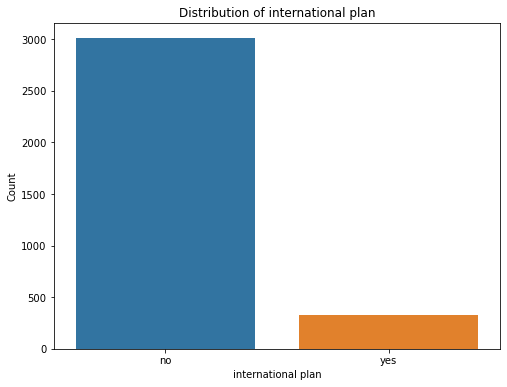

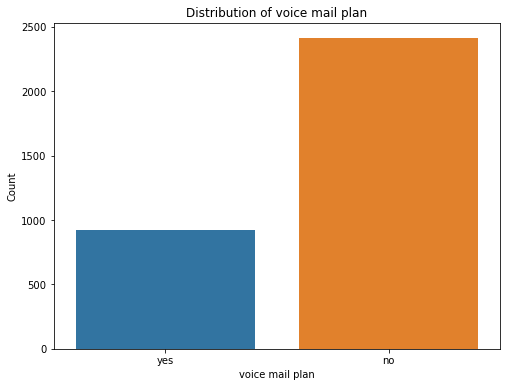

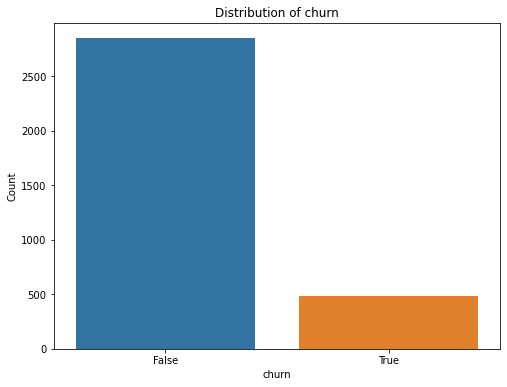

In [41]:
# Categorical features in the dataset
categorical_features = ['international plan', 'voice mail plan', 'churn']

# Visualize the distribution of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


#### Distribution of Target Variable (Churn):

It's important to examine the distribution of the target variable, "churn," to understand the balance between churned and retained customers.

False    2850
True      483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

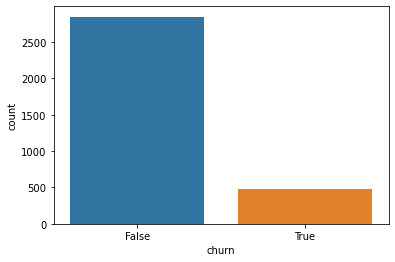

In [42]:
churn_counts = df['churn'].value_counts()
print(churn_counts)
sns.countplot(x='churn', data=df)

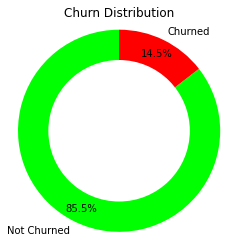

In [43]:
# Calculate the count of churned and not churned customers
churn_counts = df['churn'].value_counts()

# Create a donut plot
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=['#00FF00', '#ff0000'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title("Churn Distribution")

# Display the plot
plt.axis('equal')
plt.show()

In [44]:
for feature in categorical_features:
    churn_rates = df.groupby(feature)["churn"].mean()
    print(f"Churn Rates for {feature}:\n{churn_rates}\n")

Churn Rates for international plan:
international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64

Churn Rates for voice mail plan:
voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64

Churn Rates for churn:
churn
False    False
True      True
Name: churn, dtype: bool



## Numerical Features Analysis

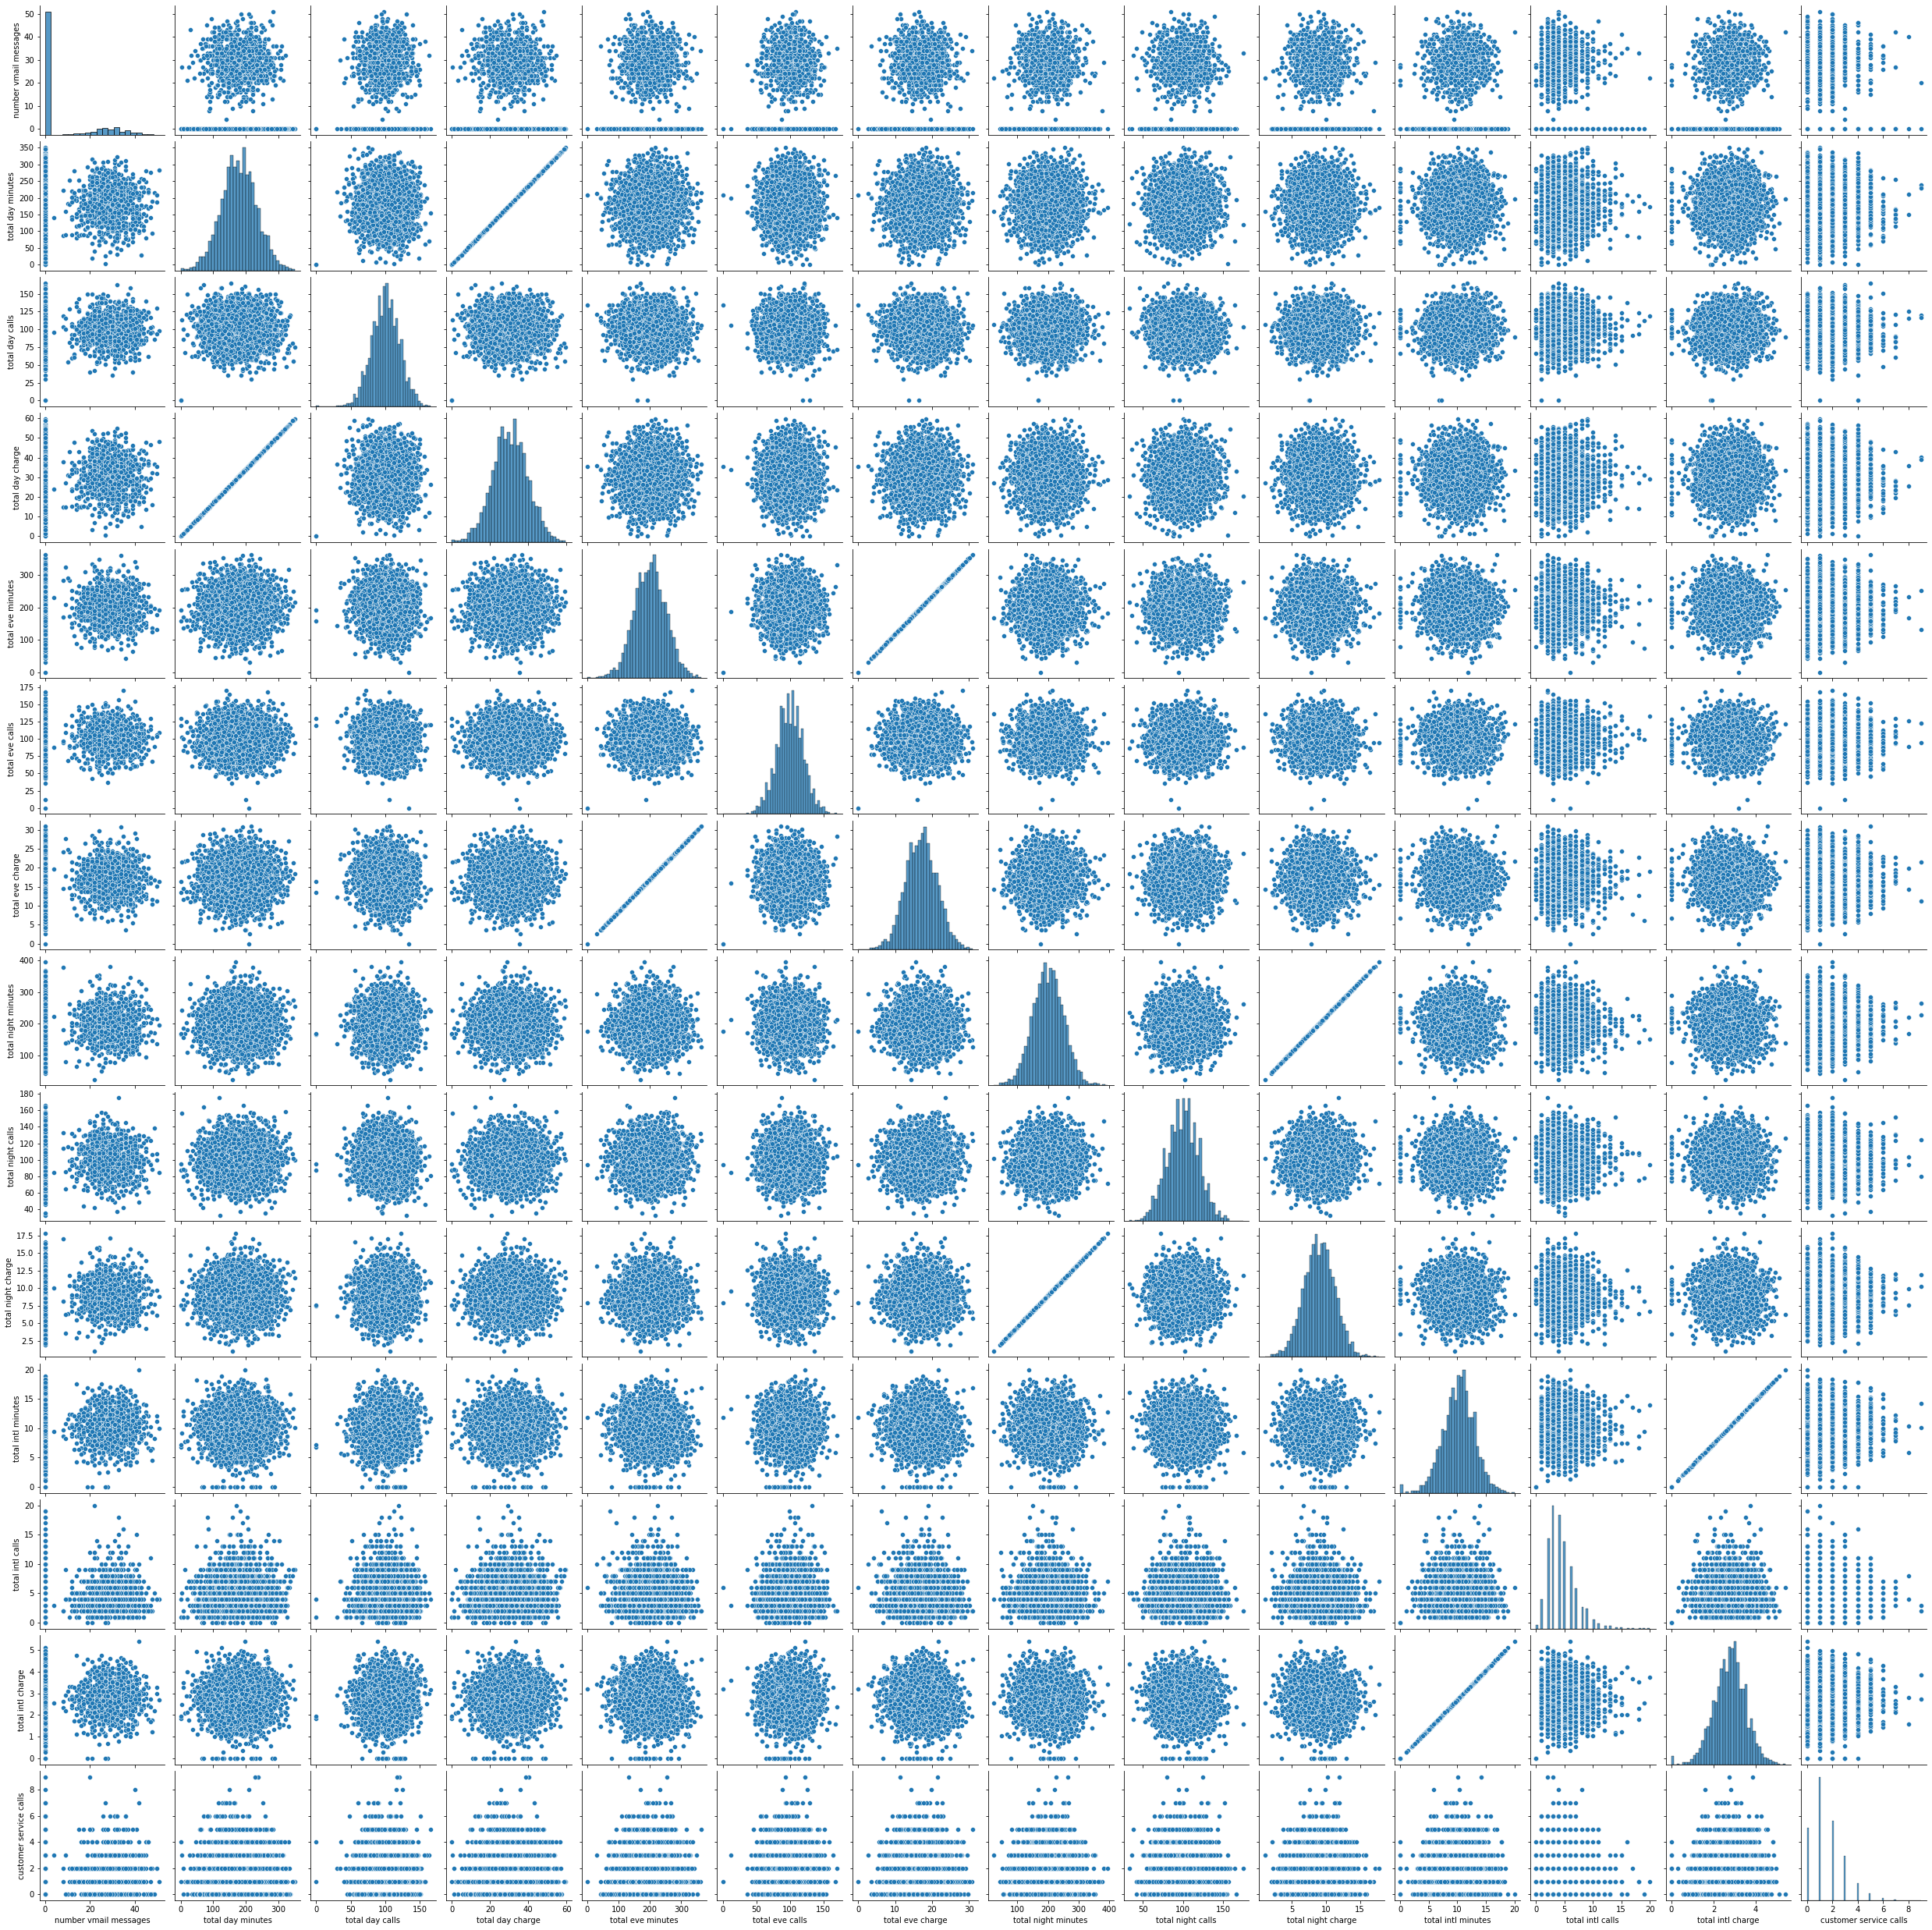

In [45]:
# Numerical features in the dataset
numerical_features = [ 'number vmail messages', 'total day minutes', 'total day calls',
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                      'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                      'total intl calls', 'total intl charge', 'customer service calls']
# Create a pair plot
sns.pairplot(df[numerical_features])
plt.show()


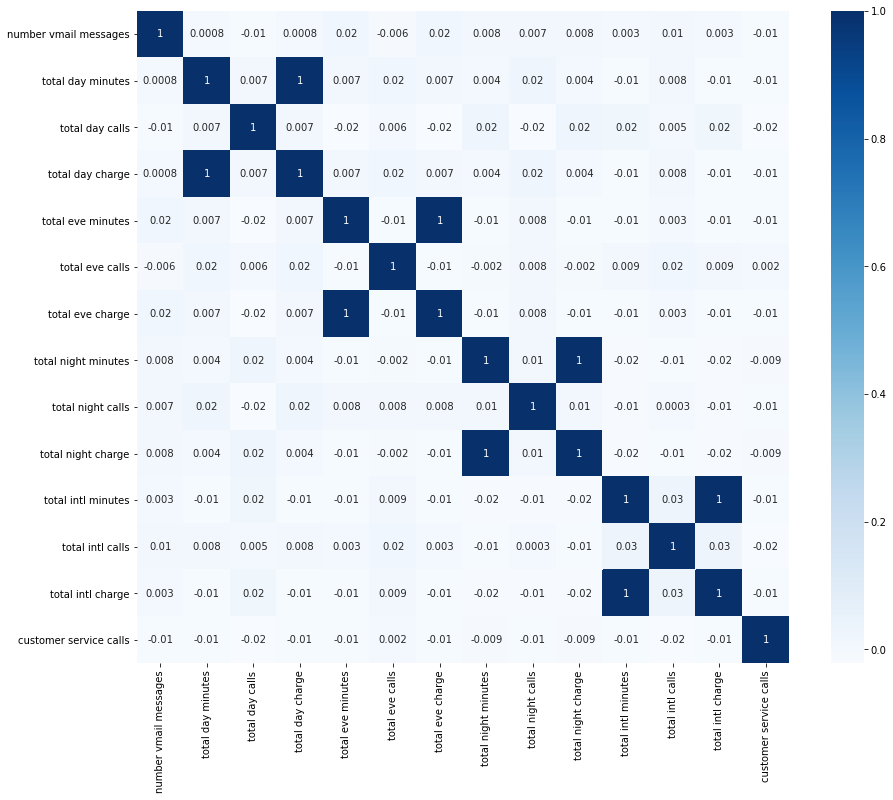

In [46]:
corr_mat = df[numerical_features].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

In [47]:
# create an instance of the scaler
scaler = StandardScaler()

# transforming the data
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]

number vmail messages  total day minutes  total day calls  \
0                  1.234883           1.566767         0.476643   
1                  1.307948          -0.333738         1.124503   
2                 -0.591760           1.168304         0.675985   
3                 -0.591760           2.196596        -1.466936   
4                 -0.591760          -0.240090         0.626149   
...                     ...                ...              ...   
3328               2.038605          -0.432895        -1.167924   
3329              -0.591760           0.942447        -2.164631   
3330              -0.591760           0.018820         0.426808   
3331              -0.591760           0.624778         0.227466   
3332               1.234883           1.003042         0.626149   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0             1.567036          -0.070610        -0.055940         -0.070427   
1            -0.334013          -0.108080         0.144867         -0.107549   
2             1.168464          -1.573383         0.496279         -1.573900   
3             2.196759          -2.742865        -0.608159         -2.743268   
4            -0.240041          -1.038932         1.098699         -1.037939   
...                ...                ...              ...               ...   
3328         -0.433386           0.286348         1.299506          0.286880   
3329          0.942714          -0.938353        -2.264816         -0.938172   
3330          0.019193           1.731930        -2.114211          1.732349   
3331          0.625153          -0.816080        -0.808966         -0.815203   
3332          1.003202           1.280309        -0.909370          1.279915   

      total night minutes  total night calls  total night charge  \
0                0.866743          -0.465494            0.866029   
1                1.058571           0.147825            1.059390   
2               -0.756869           0.198935           -0.755571   
3               -0.078551          -0.567714           -0.078806   
4               -0.276311           1.067803           -0.276562   
...                   ...                ...                 ...   
3328             1.547039          -0.874374            1.547188   
3329            -0.189297           1.170023           -0.188670   
3330            -0.177431          -0.465494           -0.175486   
3331            -1.219628           1.885562           -1.221396   
3332             0.801482          -1.181033            0.800110   

      total intl minutes  total intl calls  total intl charge  \
0              -0.085008         -0.601195          -0.085690   
1               1.240482         -0.601195           1.241169   
2               0.703121          0.211534           0.697156   
3              -1.303026          1.024263          -1.306401   
4              -0.049184         -0.601195          -0.045885   
...                  ...               ...                ...   
3328           -0.120832          0.617898          -0.125496   
3329           -0.228304         -0.194831          -0.231645   
3330            1.383778          0.617898           1.387123   
3331           -1.876211          2.243356          -1.876950   
3332            1.240482         -0.194831           1.241169   

      customer service calls  
0                  -0.427932  
1                  -0.427932  
2                  -1.188218  
3                   0.332354  
4                   1.092641  
...                      ...  
3328                0.332354  
3329                1.092641  
3330                0.332354  
3331                0.332354  
3332               -1.188218  

[3333 rows x 14 columns]

## Encoding

In [48]:
df= pd.get_dummies(df, columns=categorical_features, drop_first=True)

df.head()

number vmail messages  total day minutes  total day calls  \
0               1.234883           1.566767         0.476643   
1               1.307948          -0.333738         1.124503   
2              -0.591760           1.168304         0.675985   
3              -0.591760           2.196596        -1.466936   
4              -0.591760          -0.240090         0.626149   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          1.567036          -0.070610        -0.055940         -0.070427   
1         -0.334013          -0.108080         0.144867         -0.107549   
2          1.168464          -1.573383         0.496279         -1.573900   
3          2.196759          -2.742865        -0.608159         -2.743268   
4         -0.240041          -1.038932         1.098699         -1.037939   

   total night minutes  total night calls  total night charge  \
0             0.866743          -0.465494            0.866029   
1             1.058571           0.147825            1.059390   
2            -0.756869           0.198935           -0.755571   
3            -0.078551          -0.567714           -0.078806   
4            -0.276311           1.067803           -0.276562   

   total intl minutes  total intl calls  total intl charge  \
0           -0.085008         -0.601195          -0.085690   
1            1.240482         -0.601195           1.241169   
2            0.703121          0.211534           0.697156   
3           -1.303026          1.024263          -1.306401   
4           -0.049184         -0.601195          -0.045885   

   customer service calls  international plan_yes  voice mail plan_yes  \
0               -0.427932                       0                    1   
1               -0.427932                       0                    1   
2               -1.188218                       0                    0   
3                0.332354                       1                    0   
4                1.092641                       1                    0   

   churn_True  
0           0  
1           0  
2           0  
3           0  
4           0

# Modelling

In [49]:
# Split the data into features and target
# Split the data into features (X) and target (y)
X = df.drop(columns=['churn_True'])
y = df['churn_True']

X.head()

number vmail messages  total day minutes  total day calls  \
0               1.234883           1.566767         0.476643   
1               1.307948          -0.333738         1.124503   
2              -0.591760           1.168304         0.675985   
3              -0.591760           2.196596        -1.466936   
4              -0.591760          -0.240090         0.626149   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          1.567036          -0.070610        -0.055940         -0.070427   
1         -0.334013          -0.108080         0.144867         -0.107549   
2          1.168464          -1.573383         0.496279         -1.573900   
3          2.196759          -2.742865        -0.608159         -2.743268   
4         -0.240041          -1.038932         1.098699         -1.037939   

   total night minutes  total night calls  total night charge  \
0             0.866743          -0.465494            0.866029   
1             1.058571           0.147825            1.059390   
2            -0.756869           0.198935           -0.755571   
3            -0.078551          -0.567714           -0.078806   
4            -0.276311           1.067803           -0.276562   

   total intl minutes  total intl calls  total intl charge  \
0           -0.085008         -0.601195          -0.085690   
1            1.240482         -0.601195           1.241169   
2            0.703121          0.211534           0.697156   
3           -1.303026          1.024263          -1.306401   
4           -0.049184         -0.601195          -0.045885   

   customer service calls  international plan_yes  voice mail plan_yes  
0               -0.427932                       0                    1  
1               -0.427932                       0                    1  
2               -1.188218                       0                    0  
3                0.332354                       1                    0  
4                1.092641                       1                    0

In [50]:
# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [51]:
# Create and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Make predictions using the logistic regression model
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

In [53]:
# Model Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("Training Set:")
print("Accuracy:", train_accuracy)
print("Recall:", train_recall)
print("Precision:", train_precision)
print("F1 Score:", train_f1)

print()

print("Testing Set:")
print("Accuracy:", test_accuracy)
print("Recall:", test_recall)
print("Precision:", test_precision)
print("F1 Score:", test_f1)

Training Set:
Accuracy: 0.8611230175739392
Recall: 0.2088235294117647
Precision: 0.5634920634920635
F1 Score: 0.30472103004291845

Testing Set:
Accuracy: 0.865
Recall: 0.21678321678321677
Precision: 0.5740740740740741
F1 Score: 0.3147208121827411


The interpretation of the model evaluation metrics is as follows:

For the Training Set:
- Accuracy: The model correctly predicts approximately 86.11% of the samples in the training set.
- Recall: The model captures about 20.88% of the true churn cases in the training set. This indicates that the model may not be very sensitive in identifying customers who are likely to churn.
- Precision: Of the samples the model predicts as churned in the training set, about 56.35% are true churn cases. This metric represents the model's ability to avoid false alarms.
- F1 Score: The F1 score, which balances precision and recall, is approximately 30.47% for the training set. It provides a single metric to evaluate both precision and recall.

For the Testing Set:
- Accuracy: The model correctly predicts approximately 86.5% of the samples in the testing set.
- Recall: The model captures about 21.68% of the true churn cases in the testing set. Similar to the training set, the model may not be very sensitive in identifying customers who are likely to churn.
- Precision: Of the samples the model predicts as churned in the testing set, about 57.41% are true churn cases.
- F1 Score: The F1 score for the testing set is approximately 31.47%.

Overall, the model appears to have good accuracy but lacks sensitivity in identifying customers who are likely to churn (as indicated by low recall). Improving the model's ability to identify true churn cases may be beneficial for the company's churn prediction efforts.

### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a K-NN model
knn_model = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
best_weight = grid_search.best_params_['weights']
best_metric = grid_search.best_params_['metric']

# Create a K-NN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=best_k, weights=best_weight, metric=best_metric)

# Train the model on the training data
best_knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("K-Nearest Neighbors (K-NN) Model:")
print(f"Best Number of Neighbors: {best_k}")
print(f"Best Weighting Method: {best_weight}")
print(f"Best Distance Metric: {best_metric}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


K-Nearest Neighbors (K-NN) Model:
Best Number of Neighbors: 5
Best Weighting Method: uniform
Best Distance Metric: euclidean
Accuracy: 0.90
Recall: 0.30
Precision: 0.90
F1 Score: 0.45


Accuracy: 0.90: The model correctly predicted 90% of cases, which appears good at first glance.
However, it may not be the most ideal model because:

Low Recall (0.30): The model only identified 30% of actual churn cases, indicating it missed many potential churn situations.
High Precision (0.90): While the model's predictions were accurate when it identified churn, it was overly cautious and may have missed opportunities to prevent churn.
Consideration of class balance is crucial; if there's an imbalance in the dataset, high accuracy can be misleading.
In summary, the model's cautiousness results in missing actual churn cases, which is not ideal for a churn prediction project. Balancing precision and recall is essential for better results.

# Decision Tree

In [54]:
# model
dt_model = DecisionTreeClassifier(random_state=42)

# Model fitting
dt_model.fit(X_train, y_train)

# Making predictions
y_predicted_train = dt_model.predict(X_train)
y_predicted_test = dt_model.predict(X_test)

print(classification_report(y_test,y_predicted_test))
print(classification_report(y_train,y_predicted_train))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       857
           1       0.70      0.73      0.72       143

    accuracy                           0.92      1000
   macro avg       0.83      0.84      0.83      1000
weighted avg       0.92      0.92      0.92      1000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333



The Decision Tree Classifier model demonstrates superior performance compared to the Logistic Regression model across all metrics, suggesting that it serves as a more effective classifier for the dataset. This suggests that the decision tree may be a better model for predicting customer churn.

## Dealing with class imbalance

In [55]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [56]:
# Create a Decision Tree Classifier
dt1_classifier = DecisionTreeClassifier()

# Fit the model on the resampled training data
dt1_classifier.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_test_pred = dt1_classifier.predict(X_test)


test_precision = precision_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)


print("\nTest Set Metrics:")
print("Precision:", test_precision)
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)
print("Recall:", test_recall)


Test Set Metrics:
Precision: 0.6310160427807486
Accuracy: 0.906
F1 Score: 0.7151515151515151
Recall: 0.8251748251748252


Using SMOTE reduced metric scores, however the model can make more accurate predictions for clients who churn.

## Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt2_classifier = DecisionTreeClassifier()

# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a grid search object using 5-fold cross-validation and F1 score as the scoring metric
grid_search = GridSearchCV(estimator=dt2_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best F1 score
print("Best Parameters:", best_params)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best F1 Score: 0.9066565278383459


In [58]:
# Defining the model with optimal hyperparameters
dt2_tuned = DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=10,
                                   min_samples_leaf=1,
                                   min_samples_split=4)

# Fitting the model
dt2_tuned.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test data
dt2_y_pred = dt2_tuned.predict(X_test)

# Evaluating the model
dt2_f1_score = f1_score(y_test, dt2_y_pred)
dt2_acc_score = accuracy_score(y_test, dt2_y_pred)
dt2_prec_score = precision_score(y_test, dt2_y_pred)
dt2_rec_score = recall_score(y_test, dt2_y_pred)

# Printing the results
print("Metrics for Decision Tree Classifier (Tuned)")
print(f"F1 Score (Test): {dt2_f1_score:.4f}")
print(f"Accuracy Score (Test): {dt2_acc_score:.4f}")
print(f"Precision Score (Test): {dt2_prec_score:.4f}")
print(f"Recall Score (Test): {dt2_rec_score:.4f}")

Metrics for Decision Tree Classifier (Tuned)
F1 Score (Test): 0.7708
Accuracy Score (Test): 0.9340
Precision Score (Test): 0.7655
Recall Score (Test): 0.7762


## Feature selection

In [60]:
from sklearn.feature_selection import SelectFromModel

# Train a decision tree classifier
dt3 = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2)
dt3.fit(X_train_resampled, y_train_resampled)

# Select features based on feature importances
selector = SelectFromModel(dt3, prefit=True, threshold='median')
X_train_new = selector.transform(X_train_resampled)
X_test_new = selector.transform(X_test)

In [61]:
# Training a Decision Tree classifier with selected features
dt4 = DecisionTreeClassifier(criterion='entropy',
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2)

# Fitting the classifier with the new selected features (X_new)
dt4.fit(X_train_new, y_train_resampled)

# Making predictions of the test data
dt4_y_pred = dt4.predict(X_test_new)

# Calculating evaluation metrics
dt4_f1_score = f1_score(y_test, dt4_y_pred)
dt4_acc_score = accuracy_score(y_test, dt4_y_pred)
dt4_prec_score = precision_score(y_test, dt4_y_pred)
dt4_rec_score = recall_score(y_test, dt4_y_pred)

# Printing the evaluation metrics
print("Test Set Metrics:")
print(f"Precision Score: {dt4_prec_score}")
print(f"Accuracy Score: {dt4_acc_score}")
print(f"F1 Score: {dt4_f1_score}")
print(f"Recall Score: {dt4_rec_score}")

Test Set Metrics:
Precision Score: 0.7642857142857142
Accuracy Score: 0.931
F1 Score: 0.7561837455830388
Recall Score: 0.7482517482517482


After Feature selection, the perfomance of the Decision Tree Classifier decreased with an F1 score of 0.7562 compared to dt2_tuned which had an F1 score of 0.7708

## Random Forest Model Fitting

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf_y_pred = rf.predict(X_test)

# Calculate evaluation metrics
rf_f1_score = f1_score(y_test, rf_y_pred)
rf_acc_score = accuracy_score(y_test, rf_y_pred)
rf_prec_score = precision_score(y_test, rf_y_pred)
rf_rec_score = recall_score(y_test, rf_y_pred)

# Print the evaluation metrics
print("Random Forest Model Metrics:")
print(f"Precision Score: {rf_prec_score}")
print(f"Accuracy Score: {rf_acc_score}")
print(f"F1 Score: {rf_f1_score}")
print(f"Recall Score: {rf_rec_score}")

Random Forest Model Metrics:
Precision Score: 0.841726618705036
Accuracy Score: 0.952
F1 Score: 0.8297872340425533
Recall Score: 0.8181818181818182


## Hyper-parameter Tuning

In [65]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# scores
scores = ['f1', 'recall', 'precision']

# Create a grid search object using 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=scores, refit='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Scores:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Scores: 0.9473500550257204


### RandomForestClassifier Fitting

In [66]:
# Train the random forest classifier
rf2 = RandomForestClassifier(n_estimators=150,
                             random_state=42,
                             max_depth=15,
                             min_samples_leaf=1,
                             min_samples_split=2)
rf2.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
rf2_y_pred = rf2.predict(X_test)

# Evaluate the model's accuracy
rf2_f1_score = f1_score(y_test, rf2_y_pred)
rf2_acc_score = accuracy_score(y_test, rf2_y_pred)
rf2_prec_score = precision_score(y_test, rf2_y_pred)
rf2_rec_score = recall_score(y_test, rf2_y_pred)

print(f'The F1 Score of the Test Data is {rf2_f1_score}')
print()
print(f'The Accuracy Score of the Test Data is {rf2_acc_score}')
print()
print(f'The Precision Score of the Test Data is {rf2_prec_score}')
print()
print(f'The Recall Score of the Test Data is {rf2_rec_score}')

The F1 Score of the Test Data is 0.8315412186379928

The Accuracy Score of the Test Data is 0.953

The Precision Score of the Test Data is 0.8529411764705882

The Recall Score of the Test Data is 0.8111888111888111


We have to prioritize avoiding the risk of mistakenly labeling a customer as unlikely to churn when they actually do (False Negative) and losing their business. As a result, I've chosen to adjust the model's threshold to enhance our recall score, which is currently at 0.8112 in rf2. This strategic decision compels us to be more attentive to False Positives and actively implement retention strategies for this group.

### False Positives and False Negatives Trade-off

In [72]:
# Predict class probabilities
y_probability = rf2.predict_proba(X_test)

# Set the threshold for positive class prediction
threshold = 0.4 
y_pred = (y_probability[:, 1] >= threshold).astype(int)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.938
Precision: 0.7454545454545455
Recall: 0.8601398601398601
F1 Score: 0.7987012987012987


I adjusted the threshold from 0.5 to 0.4 to lower False Negatives and raise False Positives, while still retaining the model's accuracy. This boosted the recall score to 0.8558, aligning the model better with the goal of reducing the risk of losing inaccurately classified customers.

### Feature Importance

In [74]:
# Get the feature importances
importances = rf2.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the dataframe by the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the first few rows of the feature importances
print(feature_importances.head())

                   feature  importance
13  customer service calls    0.185024
1        total day minutes    0.125618
3         total day charge    0.119118
11        total intl calls    0.085201
14  international plan_yes    0.061465


Text(0.5, 1.0, 'Feature Importance')

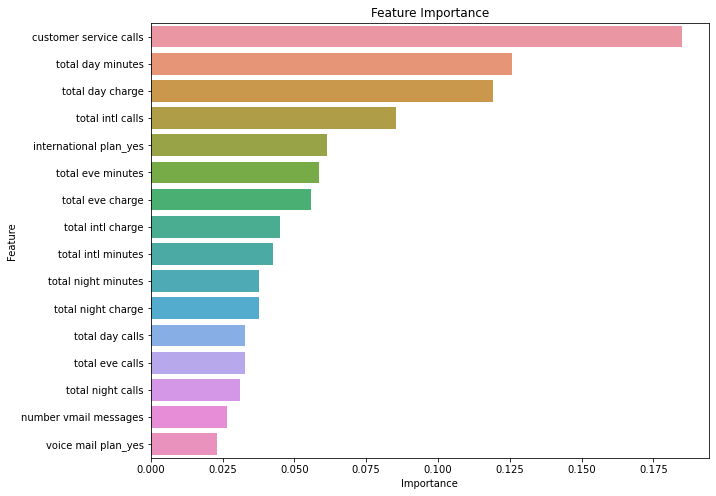

In [76]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

From our feature importance plot: customer service calls, total day minutes and total day charge are identified as the most important features contributing to customer churn.

## Model Deployment

In [79]:
import pickle

# Your trained model
model = rf2

# Save the model to a pickle file
with open("Customer_Churn_RFC.pkl", "wb") as file:
    pickle.dump(model, file)

## Conclusion

In conclusion, the analysis of customer churn, spanning from exploratory data analysis, model development, hyperparameter tuning, and threshold optimization, has offered significant insights for your business. Through an extensive evaluation of different machine learning models, it is evident that the Random Forest Classifier, equipped with an adjusted threshold of 0.4, stands out as the optimal choice for predicting customer churn. This model presents an admirable balance between precision, recall, and accuracy, with an F1 score of approximately 0.832 and an accuracy rate of 95.3%.

The analysis has unearthed the factors most influential in predicting customer churn, notably 'customer service calls,' 'total day minutes,' and 'total day charge.' To effectively reduce churn rates, it is recommended to direct your efforts towards these critical aspects of customer interactions.

By deploying the Random Forest model and its associated threshold, your business will be well-equipped to identify potential churn risks, take timely action, and, consequently, retain valuable customers. This predictive model, tuned to your specific business needs, will serve as an invaluable tool in your customer retention strategy.

To ensure the model's continued success, it is essential to maintain data quality, monitor its performance, collaborate across departments, and adhere to data privacy regulations.

Based on the analysis done, the organization now possesses the tools and insights needed to tackle customer churn effectively. With the right strategies, Telco can enhance customer satisfaction, reduce churn, and ultimately improve the business's performance. It is recommended to take these findings as the foundation for customer churn management efforts, continually refining and adapting strategies to the ever-evolving customer landscape.

## Recommendation

In light of this analysis, Telco can focus its efforts on bolstering customer satisfaction by enhancing the overall customer experience, improving the quality of its services, and implementing strategies to reduce daytime charges. Furthermore, closely monitoring the frequency of customer service calls is imperative, as a high volume of such calls may signal underlying customer dissatisfaction. Armed with these insights, Telco can tailor retention and engagement initiatives to effectively curb churn rates while simultaneously elevating overall customer satisfaction levels.